## Gradient Descent
- It would be nice if we has a more systematic way to find the values of w and b, that results in the smallest possible cost, J of w,b.
- It turns out there's an algorithm called gradient descent that can use to do that.
- Gradient Descent is ued all over the place in machine learning, not just for linear regression, but for training some of the mose advanced neural network models also called deep learning models. 
- Gradient Descent applies to more general functions, including other cost functions that work with models that have more than 2 parameters.
- In other words, we have to pick values for w_1 to w_n and b, that gives the smallest possible value of cost function j.

Outline
1. Start with some intital guesses for w and b.
2. With gradient descent algorithm, we're going to keep on chaning the parameters w and b a bit everytime to try to reudce the cost j of w, b until j settles ar or near a minimum. 

Note
- For linear regression with the squared error cost function, We end up with a bow shape or hammoc shape
- For some function j that may not be a bow shape or a hammock shape it, it is possible for there to be more than one possible minimum. These possible minimums are called local minima.
- While training a neural network model, we might get : 
- 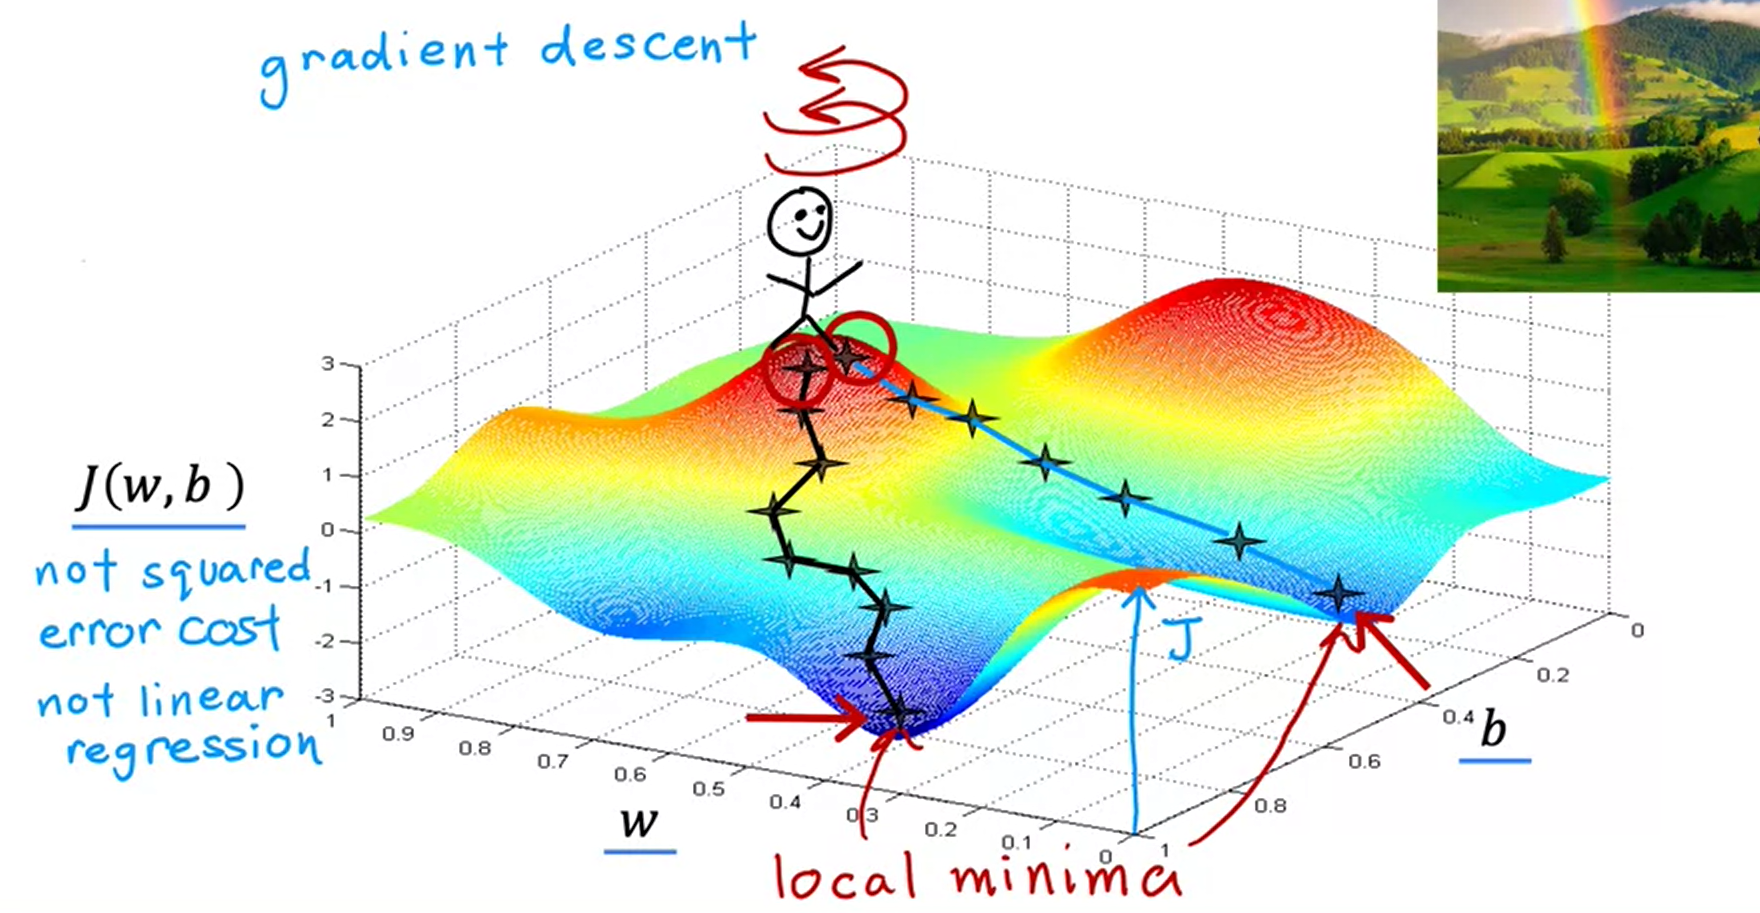

## Implementing Gradient Descent
- Gradient Descent Algorithm
1. On each step w, the paramater is updated
    - 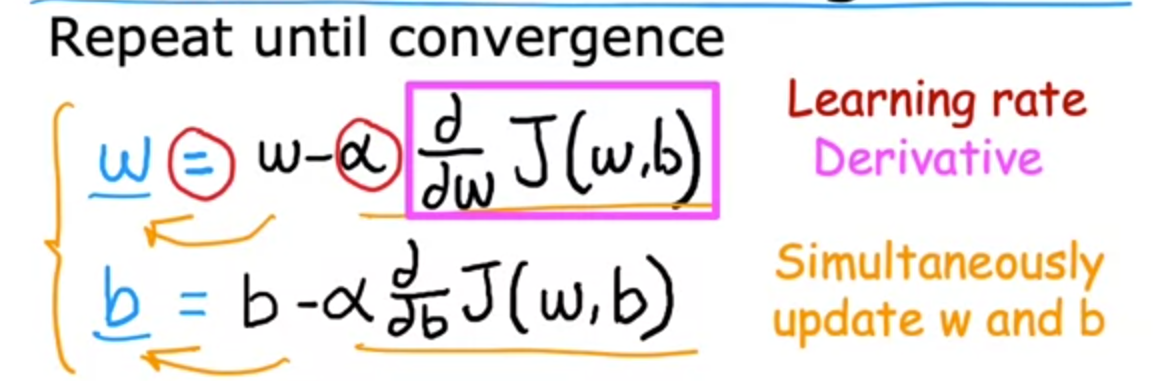
    - Taking the value of w and adjusting it a small amount, which is this expression on the right, minus Alpha time.
    - Alpha is also called learning rate. The learning rate is usually a small + numver b/w 0 and 1.
    - Alpha basically controls how big of a step you take downhill.
    - If Alpha is very large, then that corresponds to a very aggressive gradient descent procedure where we're trying to take huge steps downhill.
    - If Alpha is very small, then we'll be taking small baby steps downhill.
2. We're going to repear these 2 update steps untill the algorithm reach the point at a local minimum where the parameters w and b no longer change much with each additional step thart we take.
3. One important detial is that for graident descent we need to update w and b simultaneously.
    - 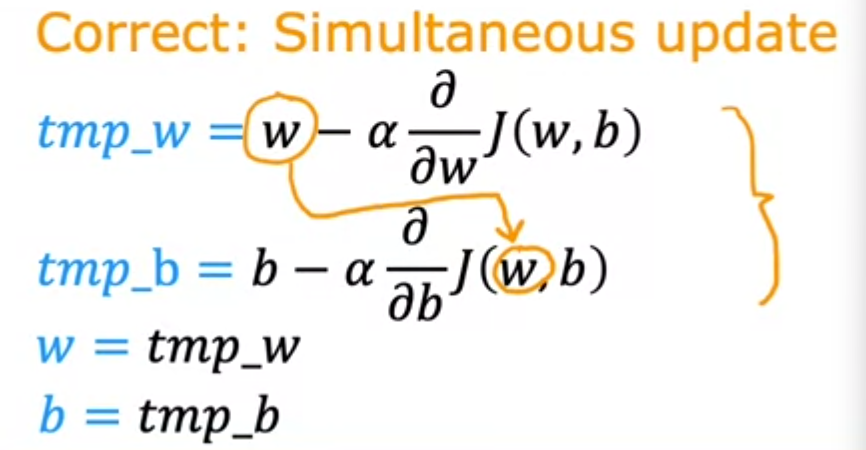

## Gradient Descent Intuition
- The learning rate (alpha) controls how big of a step to take when updating the model's parameters w and b.
    - 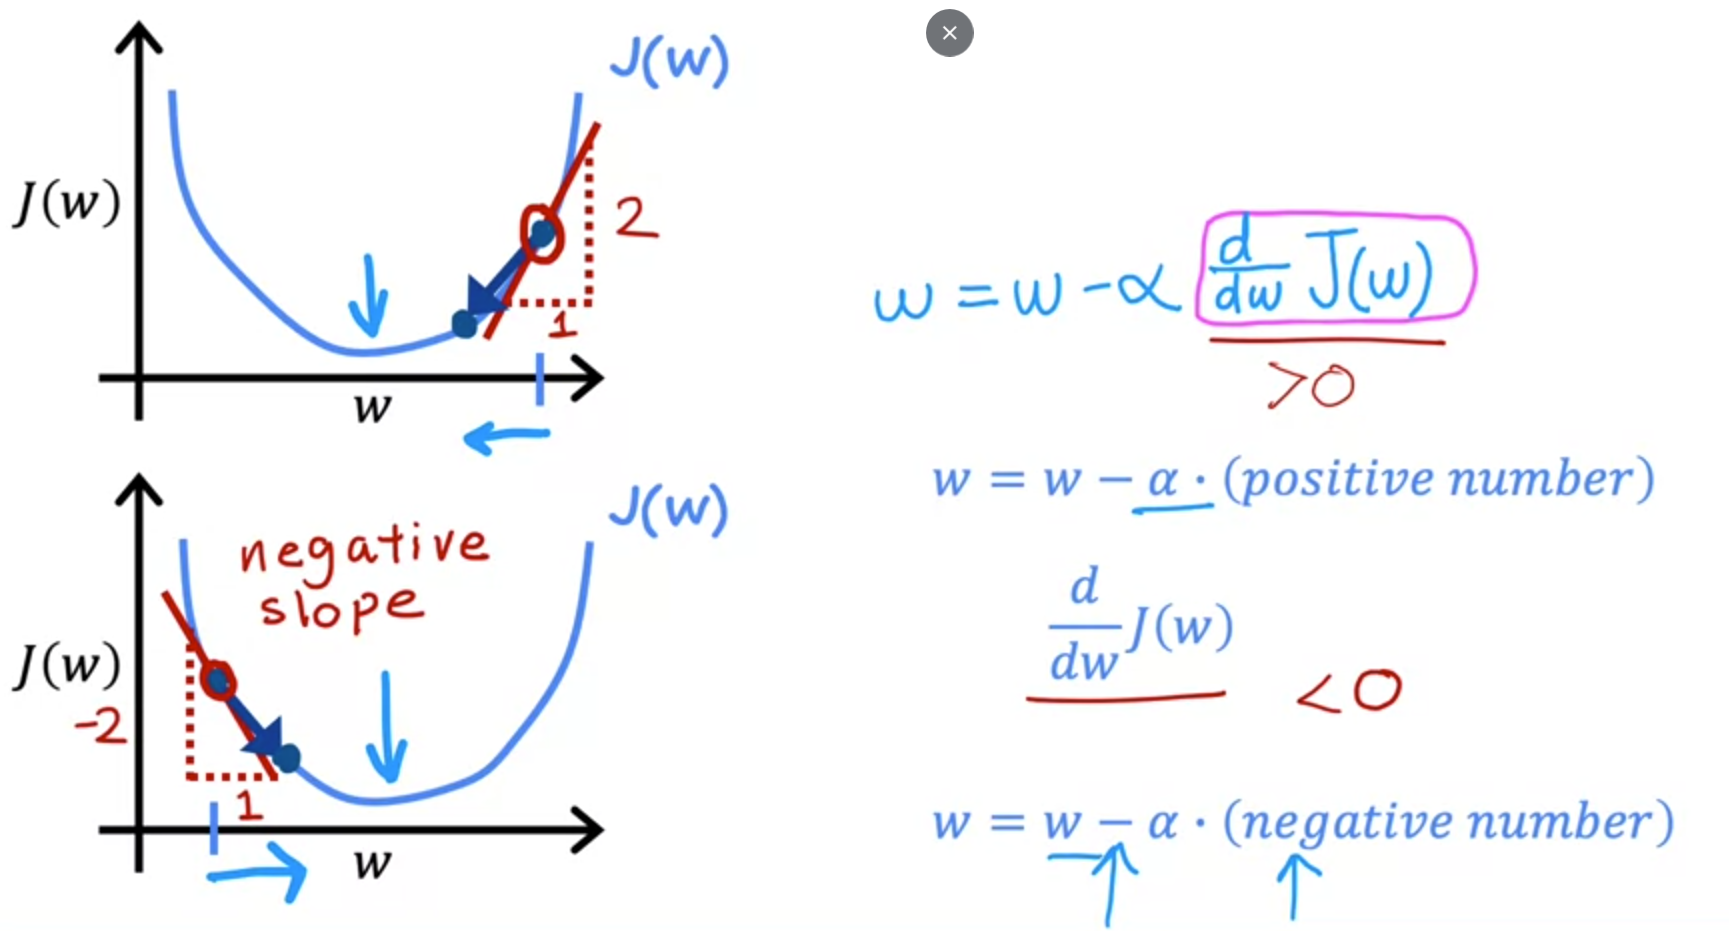

## Learning Rate
- 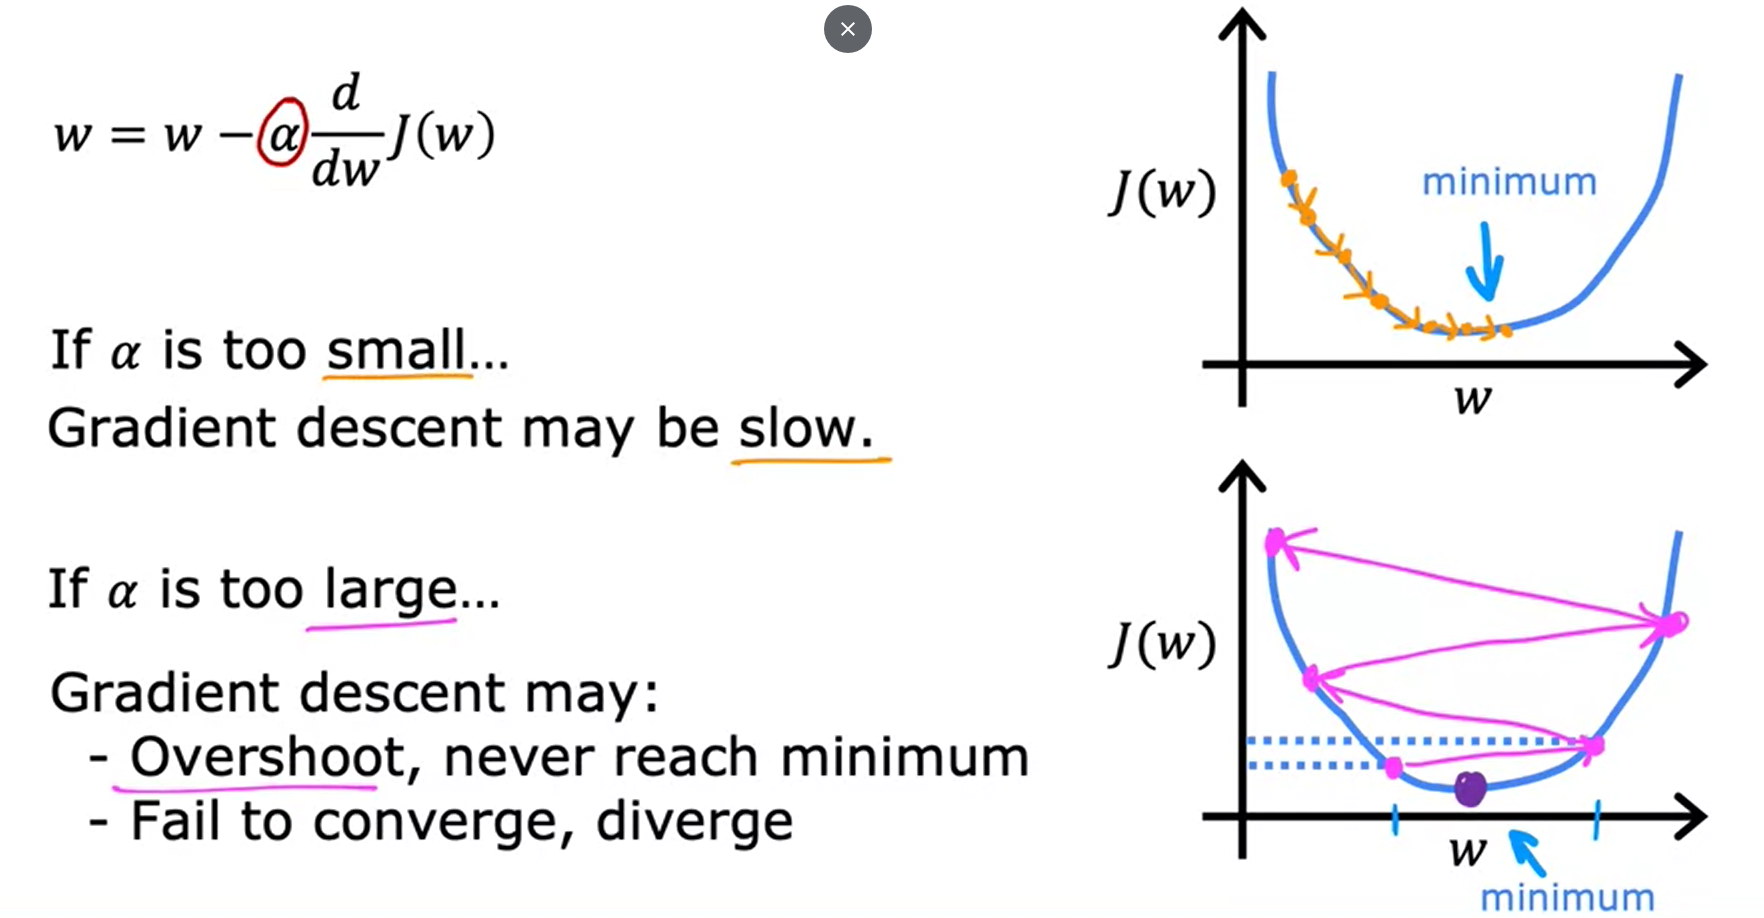
- If cost function J is already at a local minimum?
    - If we draw, the slope of the line is zero and thus the derivate term is equal to zero for the current value of W. So, the grading descent update becomes W is updated to W itself.
    - So, this means that if you're already at a local minimum, gradient descent leaves W unchanged.
    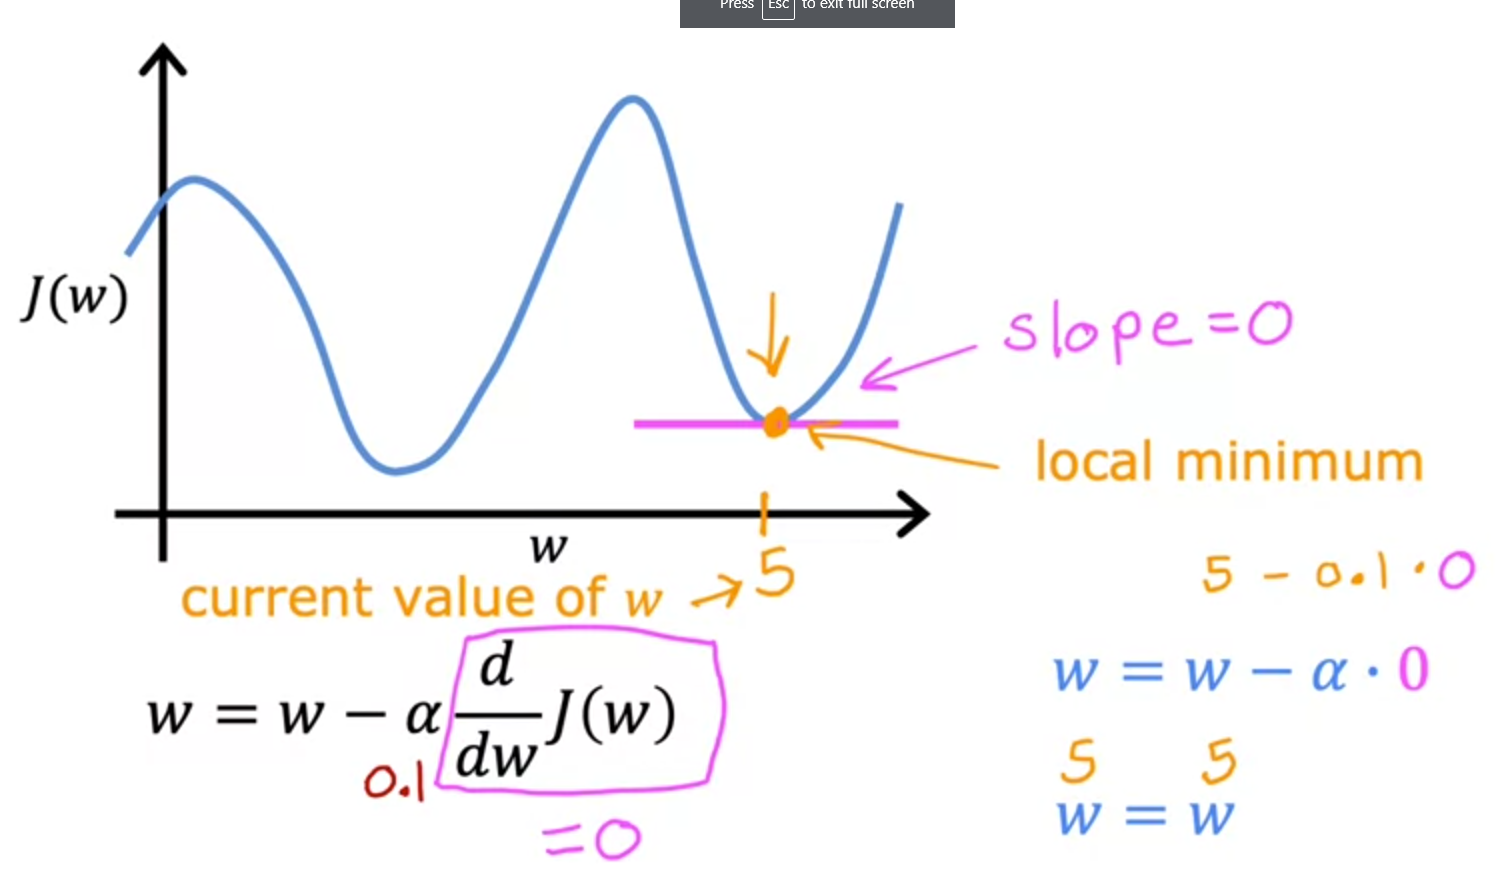
- This explains why gradient descent can reach a local minimum, ven with a fixed learning rate alpha.
    1. Let's intialize gradient descent at a point.
    2. If we take one update step, it will take to a point.
    3. Now, we're at the second point where we take another step, and we notice that the slope is not as large as it was at the first point. So, the next update step will not be as large as the first step.
    4. Similarly for third step, the derivate is smaller than it was at the previous step. and so on.
    5. It takes even smaller step as we approach the minimum. 
    - 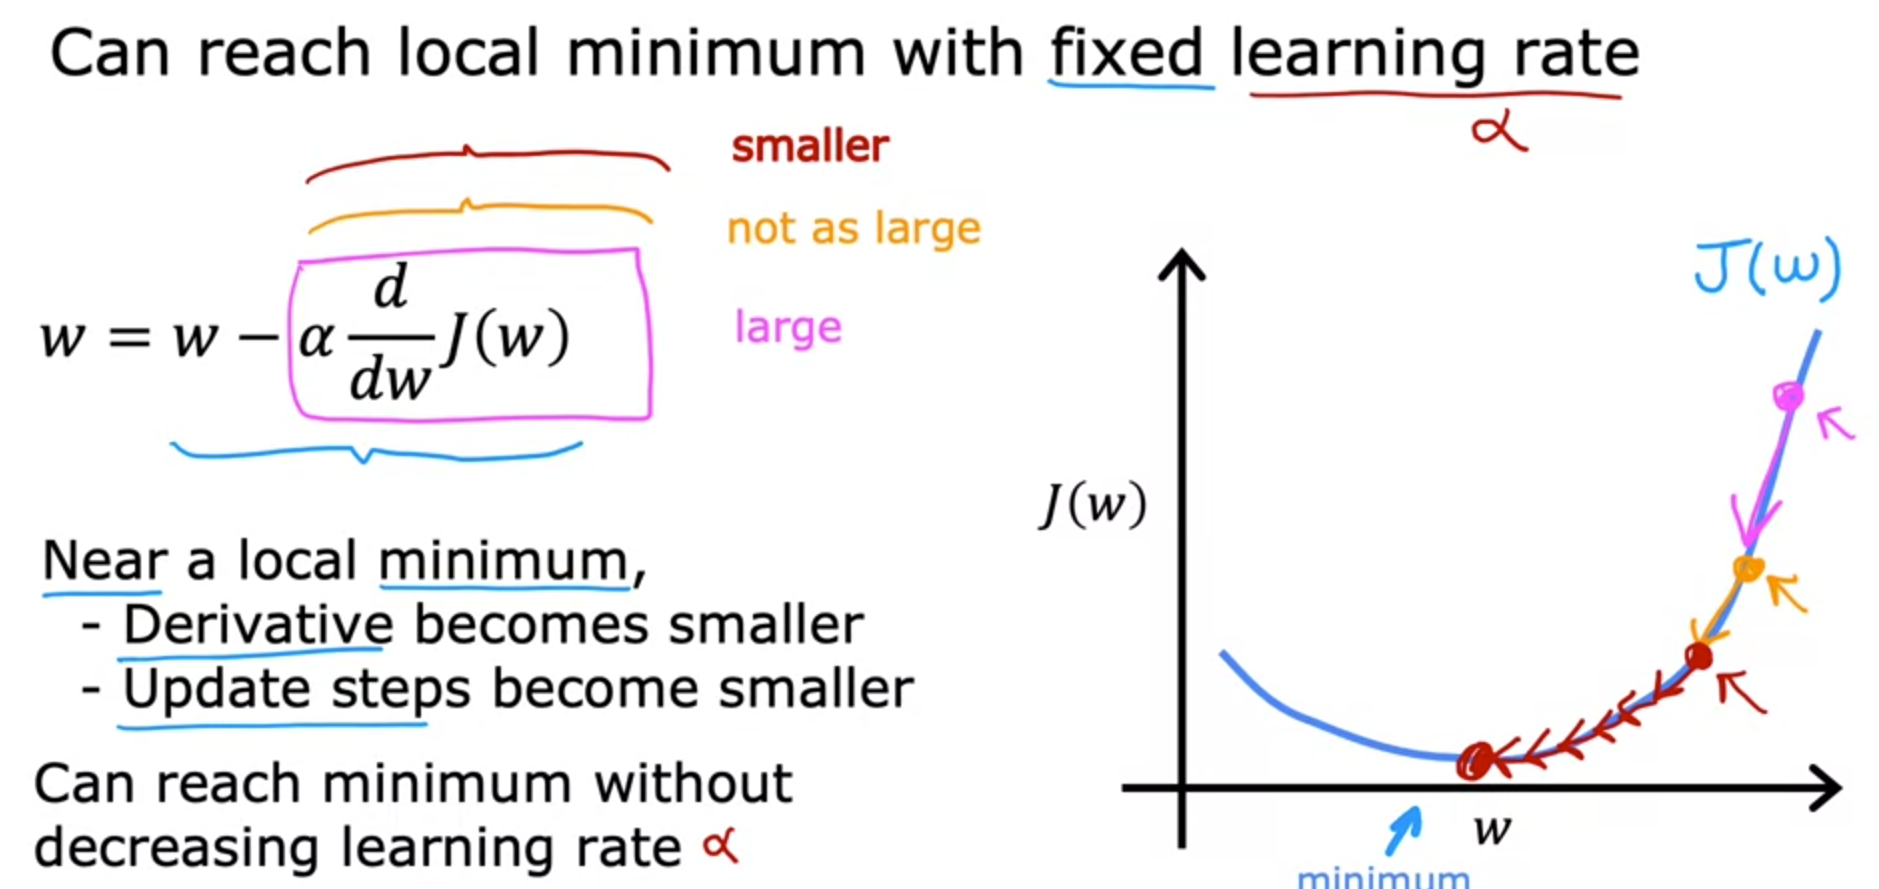
- So, we get nearer a local minimum gradient descent will automatically take smaller steps. and that's because as we approach the local minimum, the derivate automatically gets smaller.

## Gradient Descent for Linear Regression
- 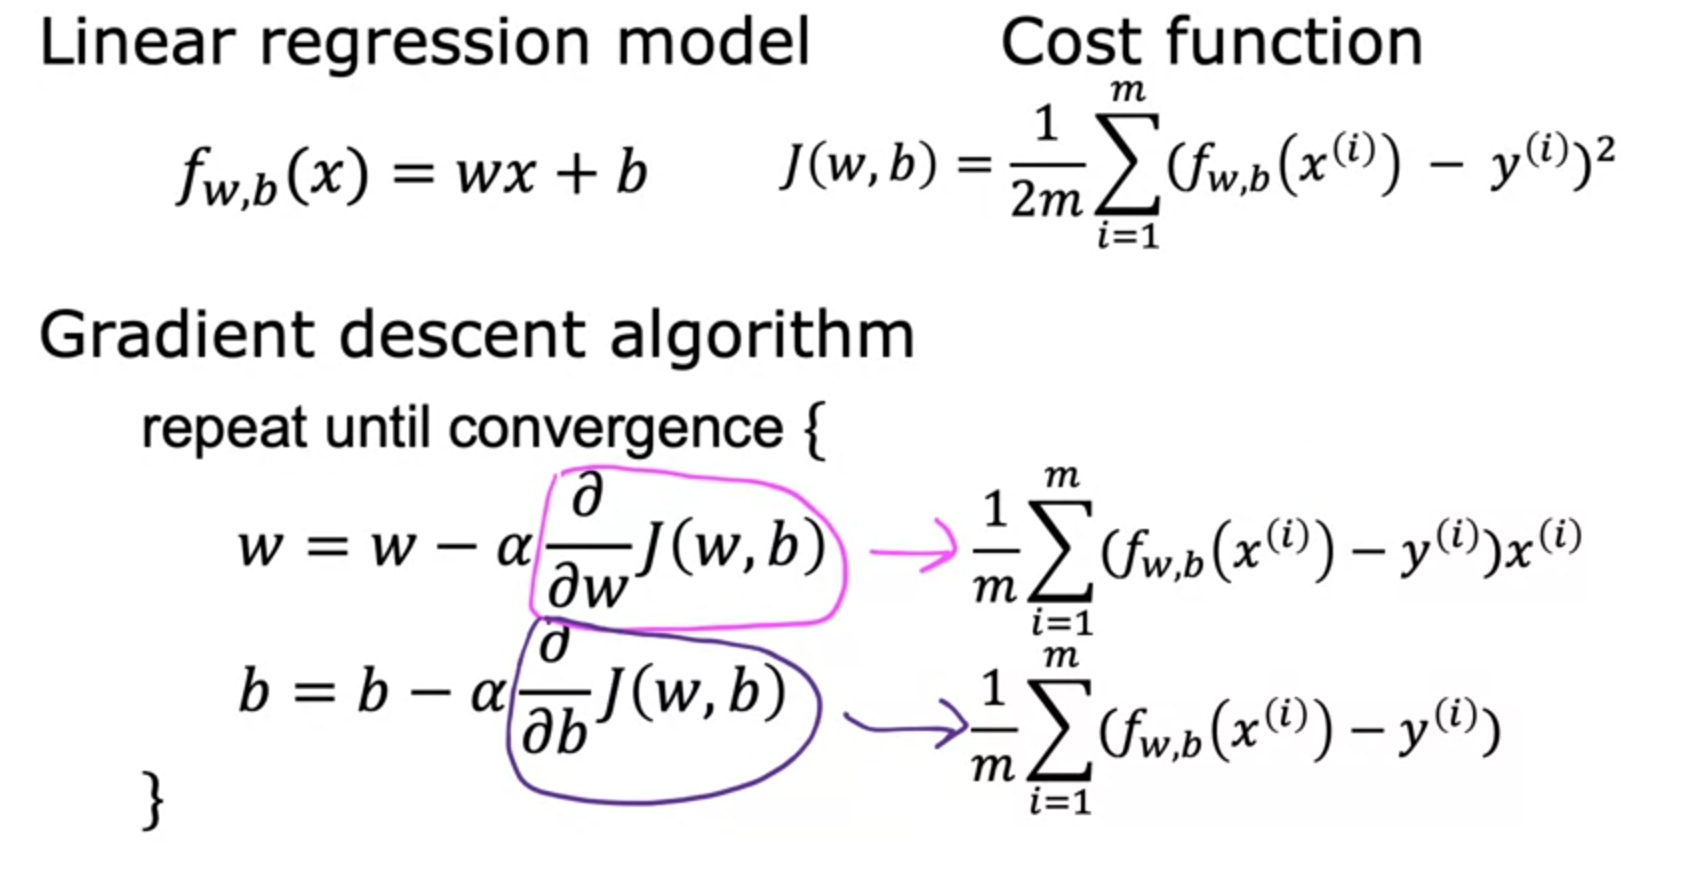

## Calculation :
- 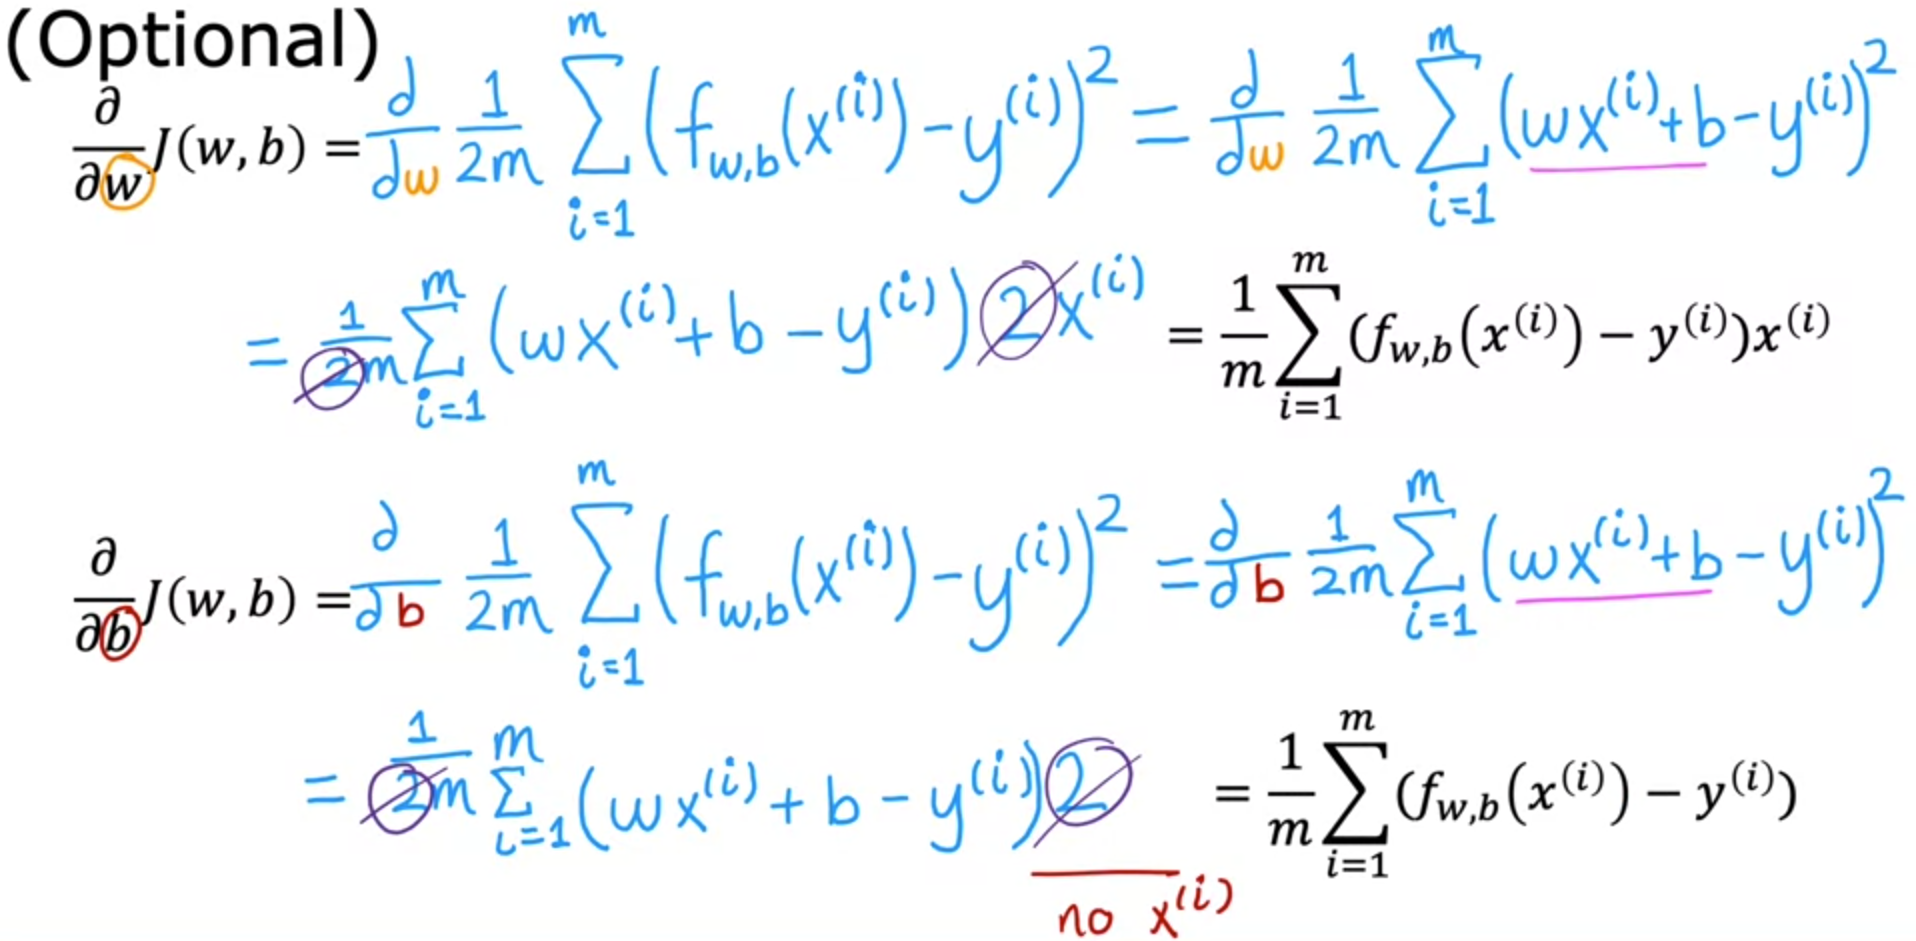

### Gradient Descent Algorithm
- 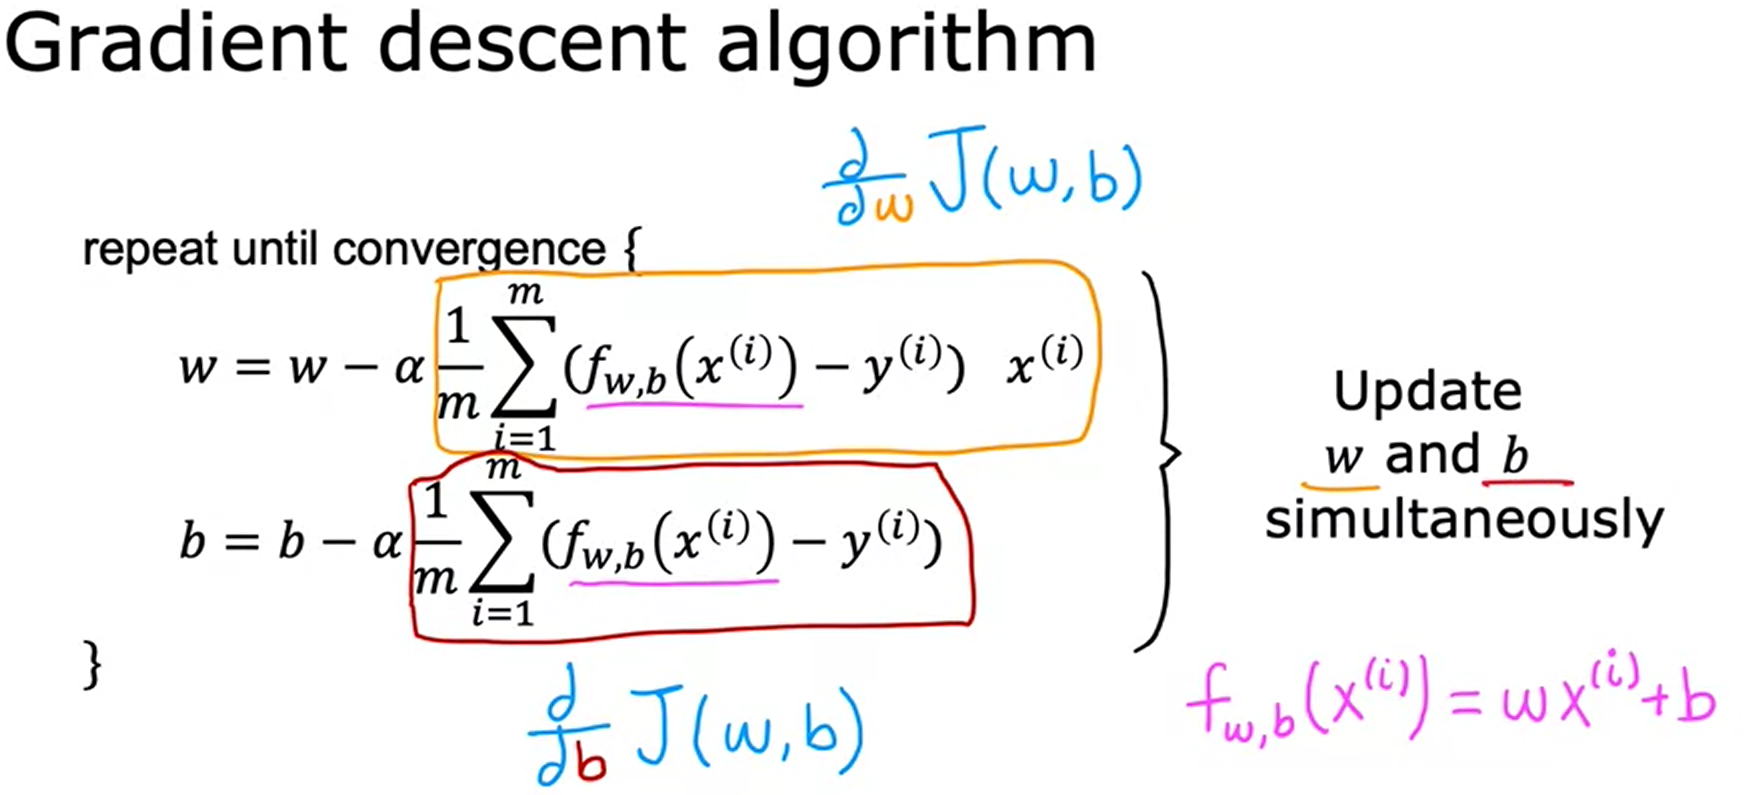

## Running Gradient Descent
- As we take more of steps, the cost is decreasing at each update. So the parameters w and b are following the trajectory
- We get the corresponding straight line fit that fits the data better and better until we've reached the gobal minimum.
- 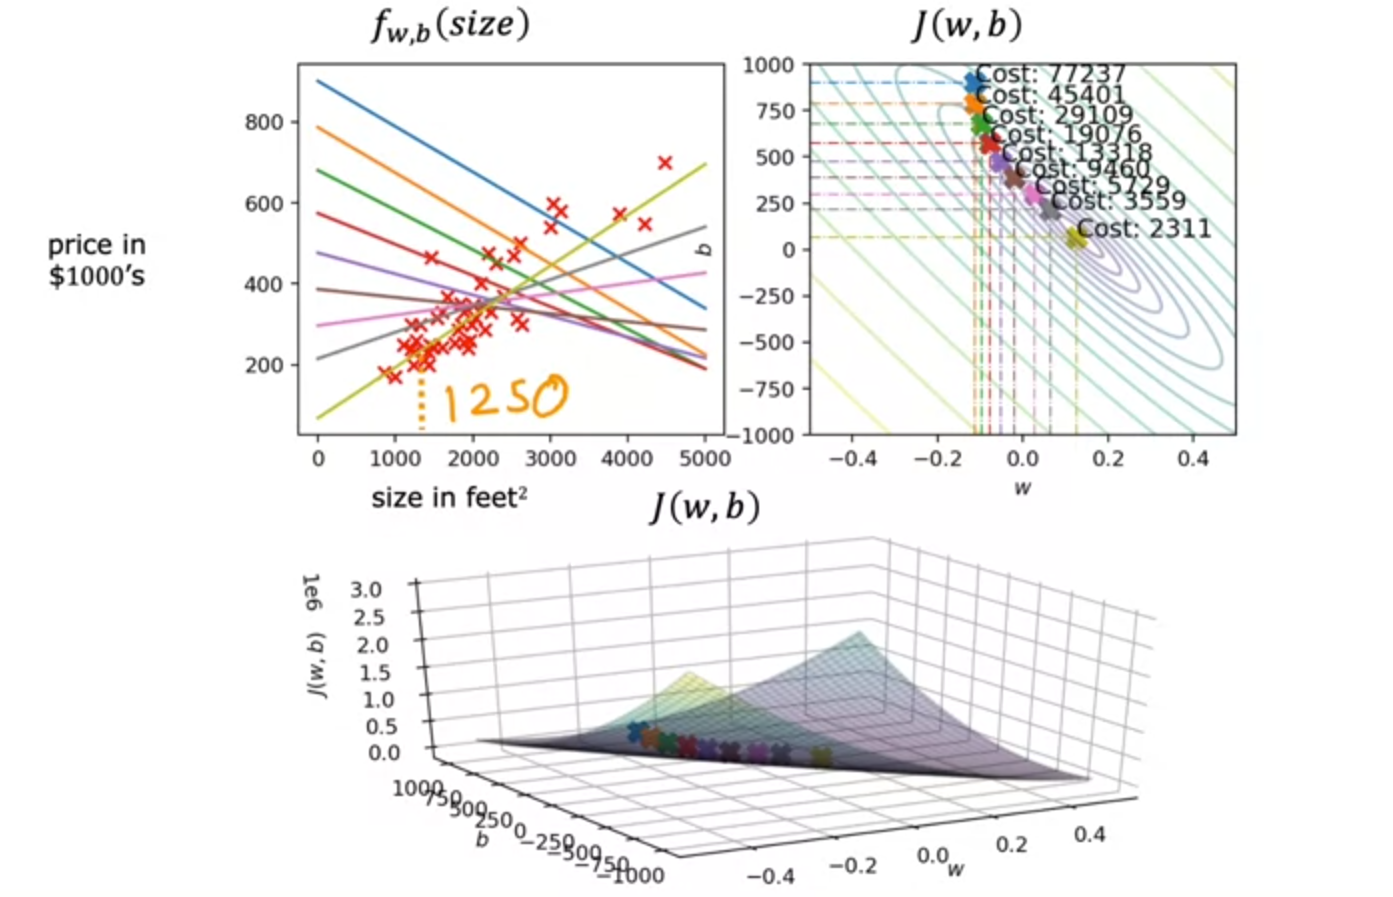
- This gradient descent process is called batch gradient descent. The term batch gradient descent refers to the fact that on every step of gradient descent, we're looking at all of the training exampes, instea of just a subset of the training data.

## LAB : To automate the process of optimizing w and b using gradient descent

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

#### Compute cost

In [3]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        cost += (f_wb - y[i])**2
        
    total_cost = 1/(2*m)*cost
    return total_cost

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 
In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [4]:
def compute_gradient(x, y, w, b):
    '''
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b    
    '''
    
    m = x.shape[0]
    dj_dw = 0;
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
        
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [5]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    '''
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
    '''
    
    # An array to store cost J and w's at each iteration 
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient function
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        if i<100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, J_history, p_history
            

In [6]:
w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 1.0e-2
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


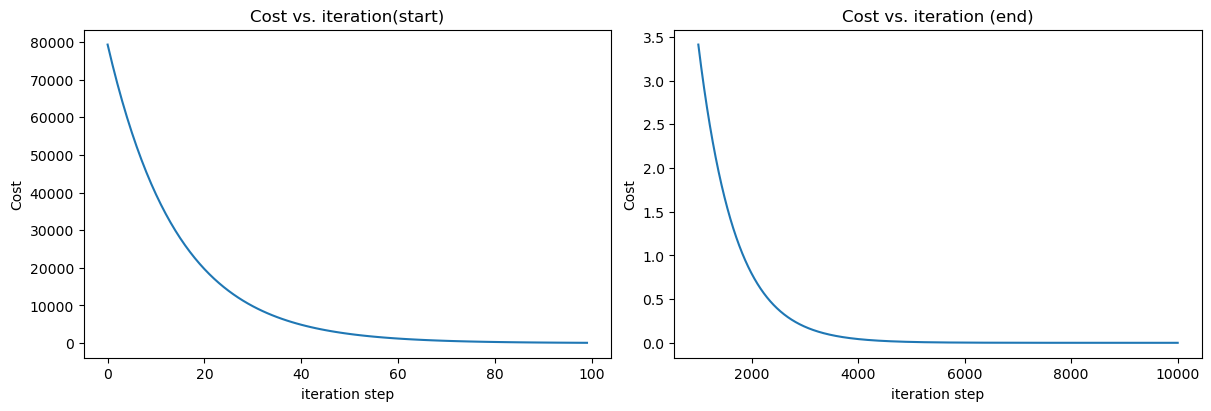

In [7]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [8]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
